Calculated actual area (e^-2 - e^-6): 0.1328565311
Adjusted bbox: Bbox(x0=1.0, y0=0.0, x1=3.0, y1=0.2706705664732254)
total_dots = 5,000


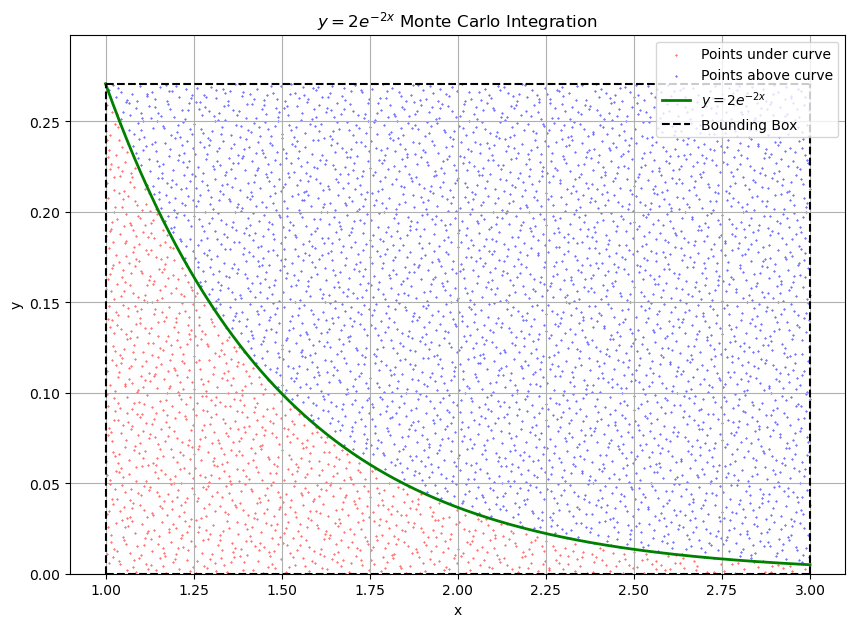

dots = 5,000
act = 0.1328565311
est = 0.1328451140
err = 0.00859%


In [10]:
"""particle_location.py"""
# Cell 01

#Reference: Gemini AI on Monte Carlo Sims
# https://en.wikipedia.org/wiki/Exponential_distribution

# Refer to particle_location.pdf for LaTeX derivation for the constant c for the wave function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from numba import float64, int64, vectorize

@vectorize([float64(int64, int64)], nopython=True)
def halton(n, p):
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h

# Define the function
def f(x):
    return 2 * np.exp(-2 * x)

# Define the x-range for integration
x_start = 1
x_end = 3

# Calculate the actual area under the curve within the x-range [x_start, x_end]
actual_area = np.exp(-2 * x_start) - np.exp(-2 * x_end)
print(f"Calculated actual area (e^-2 - e^-6): {actual_area:.10f}")

# Determine the appropriate bounding box height
max_y_in_range = f(x_start) # Max value of 2e^(-2x) in [1, 3] is at x=1
bbox_height = max_y_in_range # Ensure the box covers the curve's height

bbox = Rectangle((x_start, 0), x_end - x_start, bbox_height).get_bbox()
print(f"Adjusted bbox: {bbox}")

total_dots = 5000 # Increased dots for better accuracy
print(f"{total_dots = :,}")

# Generate Halton sequence points
x_halton = (1 - halton(np.arange(total_dots), 2)) # Values in [0, 1)
y_halton = (1 - halton(np.arange(total_dots), 3)) # Values in [0, 1)

# Scale points to the bounding box
x = x_halton * bbox.width + bbox.x0
y = y_halton * bbox.height + bbox.y0

# Check if points are under the curve
d = y - f(x) # d <= 0 means y is below or on the curve

x_in = x[d <= 0.0]
y_in = y[d <= 0.0]
x_out = x[d > 0.0]
y_out = y[d > 0.0]

plt.figure(figsize=(10, 7))
plt.scatter(x_in, y_in, color="red", marker=".", s=0.5, label='Points under curve')
plt.scatter(x_out, y_out, color="blue", marker=".", s=0.5, label='Points above curve')

# Plot the function itself for visual verification
x_curve = np.linspace(x_start, x_end, 500)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, color='green', linewidth=2, label='$y=2e^{-2x}$')

# Plot the bounding box
plt.hlines(bbox.y0, bbox.x0, bbox.x1, color='black', linestyle='--', label='Bounding Box')
plt.hlines(bbox.y1, bbox.x0, bbox.x1, color='black', linestyle='--')
plt.vlines(bbox.x0, bbox.y0, bbox.y1, color='black', linestyle='--')
plt.vlines(bbox.x1, bbox.y0, bbox.y1, color='black', linestyle='--')


plt.title("$y=2e^{-2x}$ Monte Carlo Integration")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.ylim(0, bbox_height * 1.1) # Adjust y-axis limit for better viewing
plt.xlim(x_start - 0.1, x_end + 0.1)
plt.show()

# Estimate the area
est = (bbox.width * bbox.height) * np.count_nonzero(d <= 0) / total_dots
err = np.abs((actual_area - est) / actual_area)

print(f"dots = {total_dots:,}")
print(f"act = {actual_area:.10f}")
print(f"est = {est:.10f}")
print(f"err = {err:.5%}")


In [12]:
#Cell 02
from scipy.integrate import quad

#Reference: Gemini AI

def integrand_function(x):
    # This represents 2 * e^(-2x), which comes from |sqrt(2) * e^(-x)|^2
    return 2 * np.exp(-2 * x)

# Define the integration limits
lower_limit = 1
upper_limit = 2.997702 # Use np.inf for integration to infinity

# Perform the numerical integration
# quad returns a tuple: (result of integral, estimated absolute error)
numerical_integral_result, estimated_abs_error = quad(integrand_function, lower_limit, upper_limit)

# Calculate the analytical result (e^-2)
analytical_result = np.exp(-2)

# Calculate the relative error
# Formula: |(Numerical - Analytical) / Analytical|
if analytical_result != 0: # Avoid division by zero
    relative_error = abs((numerical_integral_result - analytical_result) / analytical_result)
else:
    # Handle the case where analytical_result is zero (e.g., if numerical_integral_result is also zero)
    # If analytical is zero and numerical is non-zero, relative error is infinite.
    # If both are zero, relative error is usually considered zero or undefined.
    if numerical_integral_result == 0:
        relative_error = 0.0 # Or np.nan for undefined
    else:
        relative_error = np.inf # Infinite relative error

print(f"Numerical integral result: {numerical_integral_result}")
print(f"Estimated absolute error from quad: {estimated_abs_error}")
print(f"Analytical result (e^-2): {analytical_result}")
print(f"Calculated relative error: {relative_error:.2e}") # Print in scientific notation
print(f"Calculated relative error (%): {relative_error * 100:.4f}%") # As percentage



Numerical integral result: 0.13284511249518027
Estimated absolute error from quad: 1.4748770260106822e-15
Analytical result (e^-2): 0.1353352832366127
Calculated relative error: 1.84e-02
Calculated relative error (%): 1.8400%
